In [ ]:
%pip install segment-geospatial leafmap localtileserver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.2/488.2 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 18.6 MB/s eta 0:00

In [ ]:
import os
import leafmap
from samgeo import SamGeo,show_image,download_file,overlay_images,tms_to_geotiff


In [ ]:
m = leafmap.Map(center=[37.8713,-122.2580],zoom=17,height="800px")
m.add_basemap('SATELLITE')
m

Map(center=[37.8713, -122.258], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

Pan and zoom the map to select the area of interest, use the draw tools to draw a polygon or rectangle on the map.

In [ ]:
if m.user_roi_bounds() is not None:
  bbox = m.user_roi_bounds()
else:
  bbox = [-122.2659,37.8682,-122.2521,37.8741]
m.user_roi_bounds()

[-122.2522, 37.87, -122.249, 37.8718]

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
image = 'satellite.tif'
tms_to_geotiff(output=image,bbox=bbox,zoom=17,source='Satellite',overwrite=True)


Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


Display the downloaded image. m.layers[-1] is set to False means the last map layer is hidden ?

In [ ]:
m.layers[-1].visible=False
m.add_raster(image,layer_name='Image')
m

Map(bottom=12958509.0, center=[37.8709, -122.25059999999999], controls=(ZoomControl(options=['position', 'zoom…

In [ ]:
checkpoint = "sam_vit_h_4b8939.pth"
sam = SamGeo(
  model_type = 'vit_h',
  checkpoint = checkpoint,
  sam_kwargs = None
)

Model checkpoint for vit_h not found.


Downloading...
From: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
To: /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.56G/2.56G [00:17<00:00, 145MB/s]


In [ ]:
sam.generate(image,output='masks.tif',foreground=True,unique=True)


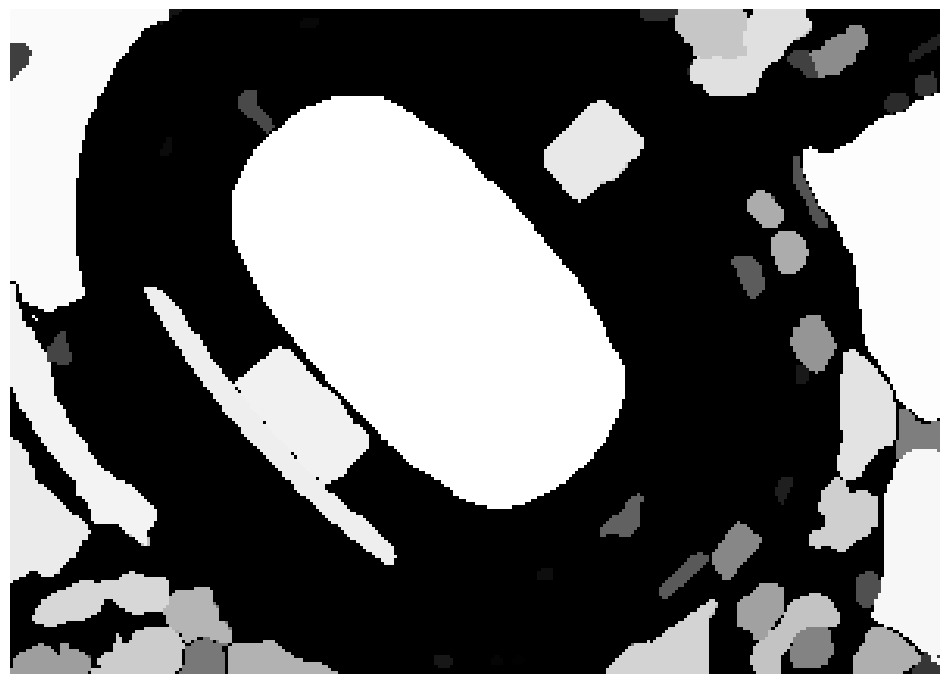

In [ ]:
sam.show_masks(cmap='binary_r')

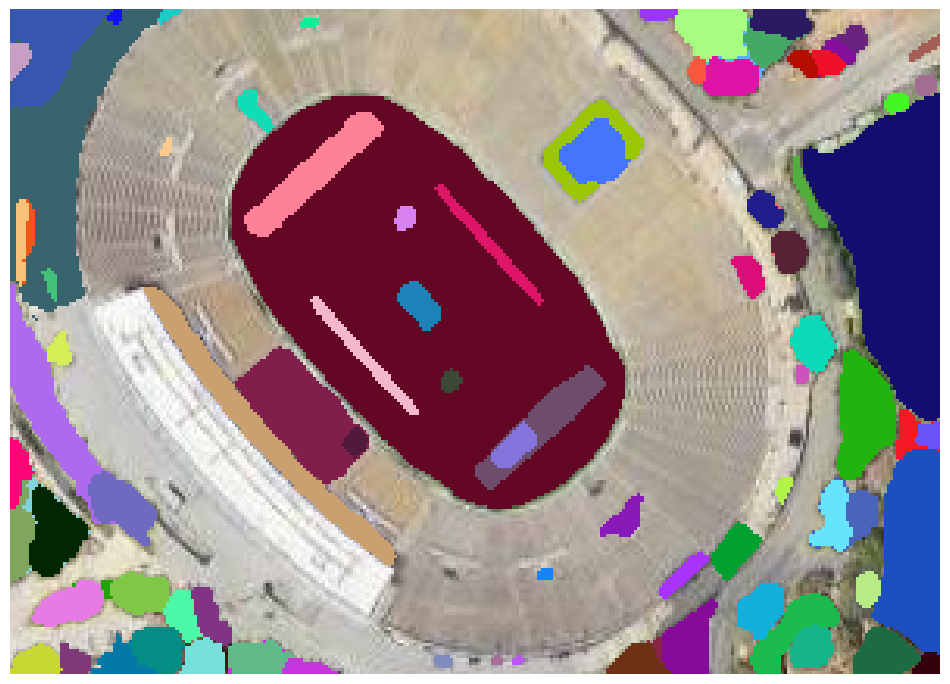

In [ ]:
sam.show_anns(axis="off",alpha=1,output='annotations.tif')



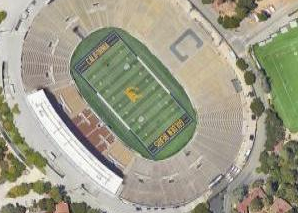
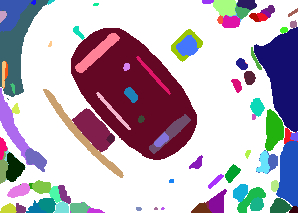

In [ ]:
leafmap.image_comparison(
    "satellite.tif",
    "annotations.tif",
    label1='Satellite Image',
    label2='Image Segmentation'
)

In [ ]:
m.add_raster("annotations.tif",alpha=0.5,layer_name='Masks')
m

Map(bottom=6479510.0, center=[37.8709, -122.25059999999999], controls=(ZoomControl(options=['position', 'zoom_…

In [ ]:
sam.tiff_to_vector('masks.tif','masks.gpkg')

In [ ]:
sam_kwargs = {
    "points_per_side":32,
    "pred_iou_thresh" : 0.86,
    "stability_score_thresh":0.92,
    "crop_n_layers":1,
    "crop_n_points_downscale_factor":2,
    "min_mask_region_area":100,
}

In [ ]:
sam = SamGeo(
    model_type='vit_h',
    checkpoint=checkpoint,
    sam_kwargs=sam_kwargs
)

In [ ]:
sam.generate(image,output='masks2.tif',foreground=True)

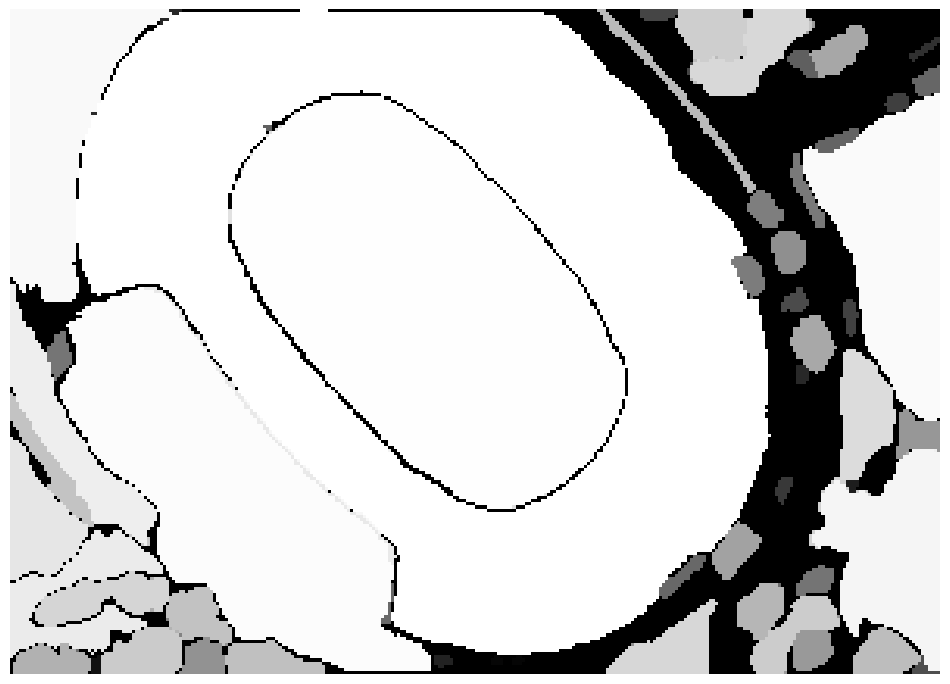

In [ ]:
sam.show_masks(cmap='binary_r')


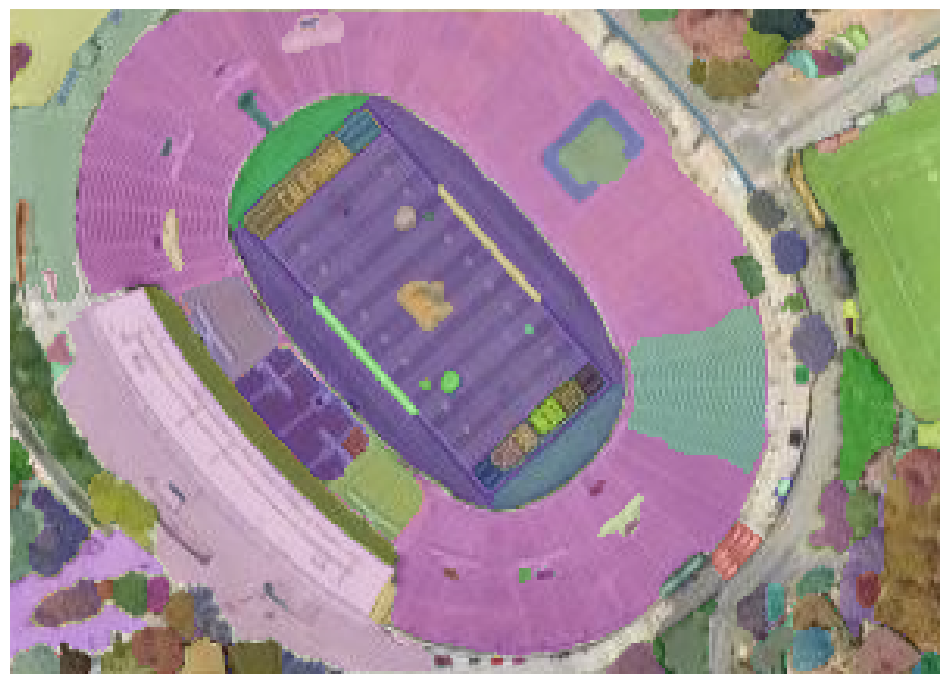

In [ ]:
sam.show_anns(axis="off",opacity=1,output="annotations2.tif")


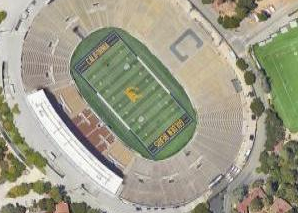
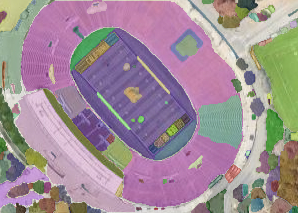

In [ ]:
leafmap.image_comparison(
    "satellite.tif",
    'annotations2.tif',
    label1="Satellite Image",
    label2='Image Segmentation'
)

In [ ]:
  overlay_images(image,'annotations2.tif',backend='TkAgg')

The TkAgg backend is not supported in Google Colab. The overlay_images function will not work on Colab.
